In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir("C:\\Users\\Ganesh\\RandPython-Part3")
from sklearn.datasets import make_classification, make_blobs

In [2]:

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
X.shape


(506, 13)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)

In [28]:
X_train.shape

(379, 13)

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#linreg = LinearRegression()
linreg = LinearRegression()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

NameError: name 'plot_sfs' is not defined

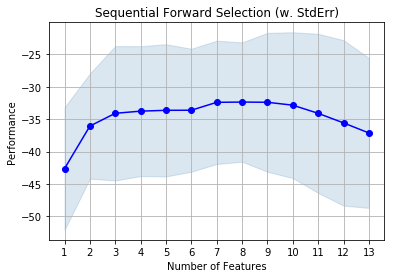

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=(1,13), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [94]:
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.90)).T

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-42.6185,19.0465,"[-23.5582499971, -41.8215743748, -73.993608929...","(12,)",18.9042,9.45212
2,-36.0651,16.3184,"[-18.002498199, -40.1507894517, -56.5286659068...","(10, 12)",16.1965,8.09826
3,-34.1001,20.87,"[-9.43012884381, -25.9584955394, -36.184188174...","(10, 12, 5)",20.7142,10.3571
4,-33.7681,20.1638,"[-8.86076528781, -28.650217633, -35.7246353855...","(10, 3, 12, 5)",20.0132,10.0066
5,-33.6392,20.5271,"[-8.90807628524, -28.0684679108, -35.827463022...","(0, 10, 3, 12, 5)",20.3738,10.1869
6,-33.6276,19.0859,"[-9.549485942, -30.9724602876, -32.6689523347,...","(0, 3, 5, 7, 10, 12)",18.9433,9.47167
7,-32.4082,19.1455,"[-10.0177149635, -28.3780298492, -30.926917231...","(0, 2, 3, 5, 7, 10, 12)",19.0026,9.50128
8,-32.3697,18.533,"[-11.1431684243, -27.5765510172, -31.168994094...","(0, 1, 2, 3, 5, 7, 10, 12)",18.3946,9.19731
9,-32.4016,21.5561,"[-10.8972555995, -25.739780653, -30.1837430353...","(0, 1, 2, 3, 5, 7, 10, 11, 12)",21.3952,10.6976
10,-32.8504,22.6508,"[-12.3909282079, -22.1533250755, -33.385407342...","(0, 1, 2, 3, 4, 5, 7, 10, 11, 12)",22.4816,11.2408


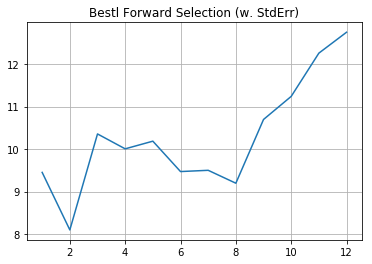

In [95]:
a=sfs.get_metric_dict()

m=[]
for i in np.arange(1,13):
    m.append(np.mean(a[i]['std_err']))

l=np.arange(1,13)
plt.plot(l,m)
plt.title('Bestl Forward Selection (w. StdErr)')
plt.grid()
plt.show()

linreg

best combination (ACC: -32.370): (0, 1, 2, 3, 5, 7, 10, 12)

('all subsets:\n', {1: {'avg_score': -42.618472789410582, 'feature_idx': (12,), 'cv_scores': array([-23.55825   , -41.82157437, -73.99360893, -50.50118016, -23.21775049])}, 2: {'avg_score': -36.0651299642116, 'feature_idx': (10, 12), 'cv_scores': array([-18.0024982 , -40.15078945, -56.52866591, -49.08360802, -16.56008824])}, 3: {'avg_score': -34.100081490306835, 'feature_idx': (10, 12, 5), 'cv_scores': array([ -9.43012884, -25.95849554, -36.18418817, -71.75796657, -27.16962833])}, 4: {'avg_score': -33.76808458181474, 'feature_idx': (10, 3, 12, 5), 'cv_scores': array([ -8.86076529, -28.65021763, -35.72463539, -69.69223644, -25.91256816])}, 5: {'avg_score': -33.639224148324885, 'feature_idx': (0, 10, 3, 12, 5), 'cv_scores': array([ -8.90807629, -28.06846791, -35.82746302, -70.42063882, -24.97147471])}, 6: {'avg_score': -33.627647762327811, 'feature_idx': (0, 3, 5, 7, 10, 12), 'cv_scores': array([ -9.54948594, -30.97246029, -32.

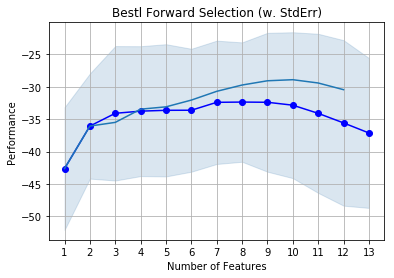

In [87]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs1 = SFS(lr, 
          k_features=(3,13), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
#fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
#fig = plot_sfs(sfs.get_metric_dict(), kind='cv_scores')
a=sfs.get_metric_dict()

m=[]
for i in np.arange(1,13):
    m.append(np.mean(a[i]['cv_scores']))

    
   
l=np.arange(1,13)
plt.plot(l,m)
plt.title('Bestl Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [88]:
a=sfs.get_metric_dict()
a

{1: {'avg_score': -42.618472789410596,
  'ci_bound': 24.297447712539704,
  'cv_scores': array([-23.55825   , -41.82157437, -73.99360893, -50.50118016, -23.21775049]),
  'feature_idx': (12,),
  'std_dev': 18.904239784513216,
  'std_err': 9.4521198922566079},
 2: {'avg_score': -36.065129964211607,
  'ci_bound': 20.817229794261007,
  'cv_scores': array([-18.0024982 , -40.15078945, -56.52866591, -49.08360802, -16.56008824]),
  'feature_idx': (10, 12),
  'std_dev': 16.196512009651258,
  'std_err': 8.0982560048256289},
 3: {'avg_score': -35.499200847742117,
  'ci_bound': 17.811071394422441,
  'cv_scores': array([-17.23292927, -44.41786483, -51.63317785, -43.58722056, -20.62481174]),
  'feature_idx': (10, 12, 7),
  'std_dev': 13.857618645495659,
  'std_err': 6.9288093227478287},
 4: {'avg_score': -33.462988003167659,
  'ci_bound': 15.828918988701703,
  'cv_scores': array([-20.64153333, -37.32478521, -47.47930298, -44.53254059, -17.33677791]),
  'feature_idx': (12, 10, 4, 7),
  'std_dev': 12.3

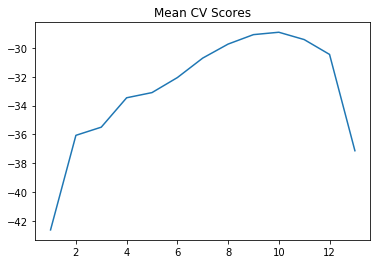

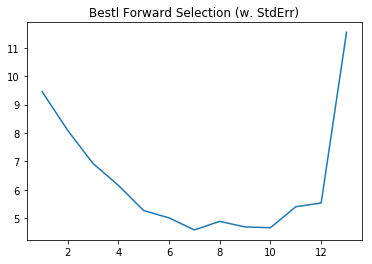

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-1.95335e-29,1.80212e-29,"[-4.20725816118e-30, -5.02371618058e-29, -1.76...","(13,)",1.78867e-29,8.94333e-30
2,-1.79411e-28,2.96585e-28,"[-6.81823307885e-29, -1.02473812639e-29, -2.37...","(12, 13)",2.9437e-28,1.47185e-28
3,-1.2469e-28,1.4855e-28,"[-9.30546510943e-29, -2.34002700202e-29, -5.04...","(3, 12, 13)",1.4744e-28,7.37202e-29
4,-1.37244e-28,1.68192e-28,"[-1.62103182092e-29, -2.10883608326e-29, -6.44...","(0, 3, 12, 13)",1.66936e-28,8.3468e-29
5,-1.97703e-28,1.40832e-28,"[-2.71924994388e-29, -7.82612502011e-29, -1.65...","(0, 2, 3, 12, 13)",1.3978e-28,6.98902e-29
6,-1.43769e-28,1.54523e-28,"[-1.27981080976e-28, -1.85577575327e-29, -7.98...","(0, 2, 3, 8, 12, 13)",1.53369e-28,7.66845e-29
7,-1.21027e-28,7.08188e-29,"[-1.46109413936e-28, -5.26740390575e-29, -1.20...","(0, 2, 3, 4, 8, 12, 13)",7.02899e-29,3.5145e-29
8,-2.41962e-28,3.26758e-28,"[-1.140909419e-28, -8.22602282553e-29, -9.9724...","(0, 2, 3, 4, 8, 10, 12, 13)",3.24318e-28,1.62159e-28
9,-1.8259e-28,1.76583e-28,"[-5.96131358573e-29, -2.86489287163e-29, -2.39...","(0, 2, 3, 4, 5, 8, 10, 12, 13)",1.75265e-28,8.76323e-29
10,-2.85947e-28,3.45078e-28,"[-2.71306279952e-29, -1.40057957945e-28, -2.48...","(0, 1, 2, 3, 4, 5, 8, 10, 12, 13)",3.42501e-28,1.7125e-28


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
#Rename the columns
df.columns=["no","crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status","cost"]
X=df[["crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status","cost"]]
y=df['cost']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=(1,14), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())

n=[]
o=[]
for i in np.arange(1,14):
    n.append(np.mean(a[i]['cv_scores'])) 
    o.append(a[i]['std_err'])
    
    
m=np.arange(1,14)

plt.plot(m,n)
plt.title('Mean CV Scores')
plt.show()
plt.plot(m,o)
plt.title('Bestl Forward Selection (w. StdErr)')
plt.show()
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.90)).T

In [37]:
df.columns=["no","crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status","cost"]

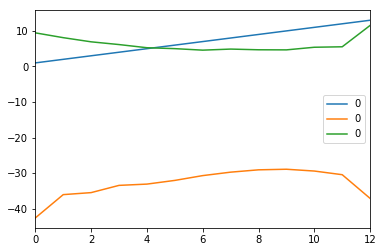

In [83]:
df1=pd.concat([pd.DataFrame(m),pd.DataFrame(n),pd.DataFrame(o)],axis=1)

df1.plot()
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
#Rename the columns
df.columns=["no","crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status","cost"]
X=df[["crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status","cost"]]
y=df['cost']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=(1,14), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
a=sfs.get_metric_dict()
a

{1: {'avg_score': -1.9533549833967679e-29,
  'ci_bound': 2.2989558083324106e-29,
  'cv_scores': array([ -4.20725816e-30,  -5.02371618e-29,  -1.76204971e-29,
          -2.56028322e-29,  -0.00000000e+00]),
  'feature_idx': (13,),
  'std_dev': 1.7886657219674129e-29,
  'std_err': 8.9433286098370645e-30},
 2: {'avg_score': -1.7941128961269181e-28,
  'ci_bound': 3.7835079889794359e-28,
  'cv_scores': array([ -6.81823308e-29,  -1.02473813e-29,  -2.37439322e-29,
          -2.80006569e-29,  -7.66882147e-28]),
  'feature_idx': (12, 13),
  'std_dev': 2.94369775362766e-28,
  'std_err': 1.4718488768138298e-28},
 3: {'avg_score': -1.2469007150945224e-28,
  'ci_bound': 1.8950383041699968e-28,
  'cv_scores': array([ -9.30546511e-29,  -2.34002700e-29,  -5.04870979e-29,
          -4.05365158e-29,  -4.15971823e-28]),
  'feature_idx': (3, 12, 13),
  'std_dev': 1.4744041813238808e-28,
  'std_err': 7.3720209066194053e-29},
 4: {'avg_score': -1.3724375677565949e-28,
  'ci_bound': 2.1456135249484042e-28,
  '

In [102]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression


df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
#Rename the columns
df.columns=["no","crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status","cost"]
X=df[["crimeRate","zone","indus","chasRiver","NO2","rooms","age",
              "distances","idxHighways","taxRate","teacherRatio","color","status"]]
y=df['cost']
lr = LinearRegression()

sfs = SFS(lr, 
         k_features=(1,13), 
          forward=True, 
         floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
a=sfs.get_metric_dict()
print(a)

{1: {'std_err': 9.4521198922566079, 'avg_score': -42.618472789410596, 'std_dev': 18.904239784513216, 'ci_bound': 24.297447712539704, 'feature_idx': (12,), 'cv_scores': array([-23.55825   , -41.82157437, -73.99360893, -50.50118016, -23.21775049])}, 2: {'std_err': 8.0982560048256289, 'avg_score': -36.065129964211607, 'std_dev': 16.196512009651258, 'ci_bound': 20.817229794261007, 'feature_idx': (10, 12), 'cv_scores': array([-18.0024982 , -40.15078945, -56.52866591, -49.08360802, -16.56008824])}, 3: {'std_err': 10.357082058624577, 'avg_score': -34.100081490306863, 'std_dev': 20.714164117249155, 'ci_bound': 26.623727020228731, 'feature_idx': (10, 12, 5), 'cv_scores': array([ -9.43012884, -25.95849554, -36.18418817, -71.75796657, -27.16962833])}, 4: {'std_err': 10.006620390178933, 'avg_score': -33.768084581814776, 'std_dev': 20.013240780357869, 'ci_bound': 25.722836620892661, 'feature_idx': (10, 3, 12, 5), 'cv_scores': array([ -8.86076529, -28.65021763, -35.72463539, -69.69223644, -25.912568

In [101]:
df.head()

,no,crimeRate,zone,indus,chasRiver,NO2,rooms,age,distances,idxHighways,taxRate,teacherRatio,color,status,cost
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
